<div class="border-box-sizing" id="notebook" tabindex="-1">
<div class="container" id="notebook-container">
<div class="cell border-box-sizing text_cell rendered"><div class="prompt input_prompt">
</div><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p>
</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In [25]:</div>
<div class="inner_cell">
<div class="input_area">
<div class="highlight hl-ipython3"><pre><span></span><span class="kn">import</span> <span class="nn">pandas</span> <span class="k">as</span> <span class="nn">pd</span>
<span class="n">pd</span><span class="o">.</span><span class="n">set_option</span><span class="p">(</span><span class="s1">'display.max_rows'</span><span class="p">,</span> <span class="mi">1000</span><span class="p">)</span>
<span class="n">pd</span><span class="o">.</span><span class="n">set_option</span><span class="p">(</span><span 
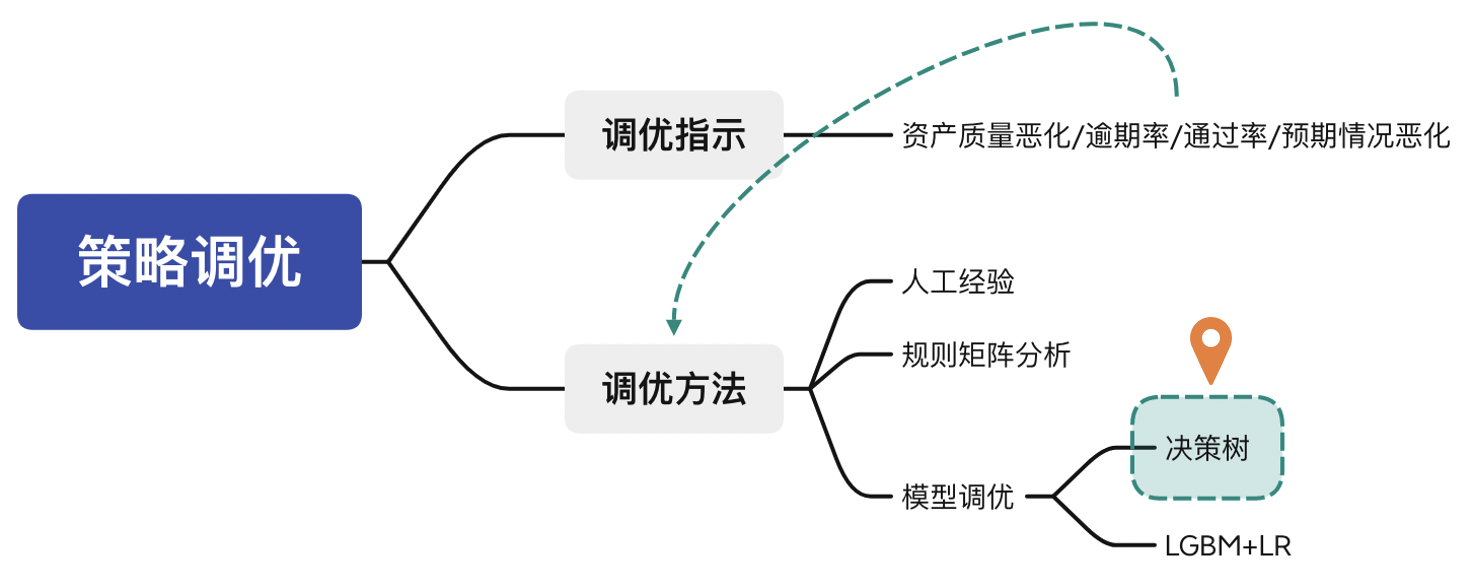
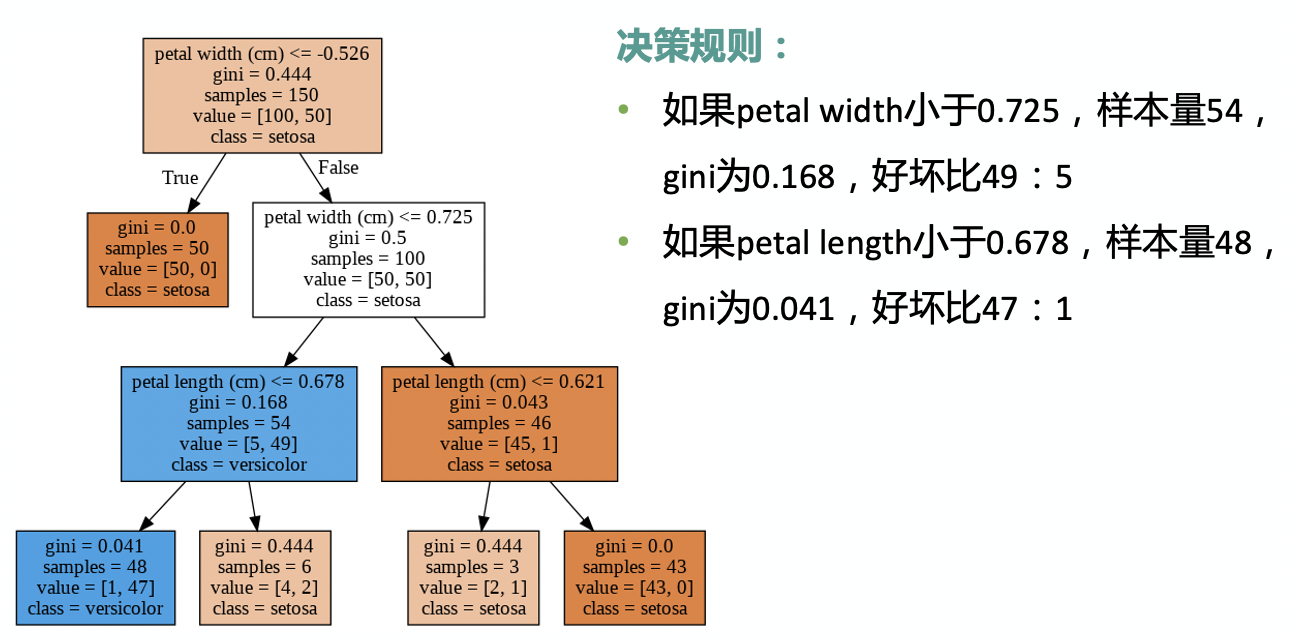
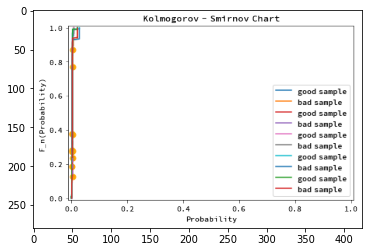

1030784

In [2]:
from bs4 import BeautifulSoup
import json
import urllib.request
# url = 'http://nbviewer.jupyter.org/url/jakevdp.github.com/downloads/notebooks/XKCD_plots.ipynb'
# response = urllib.request.urlopen(url)
# for local html file
filename = "part02"
response = open(filename + ".html")
text = response.read()

soup = BeautifulSoup(text, 'lxml')
# see some of the html
print(soup.div)
dictionary = {'nbformat': 4, 'nbformat_minor': 1, 'cells': [], 'metadata': {}}
for d in soup.findAll("div"):
    if 'class' in d.attrs.keys():
        for clas in d.attrs["class"]:
            if clas in ["text_cell_render", "input_area"]:
                # code cell
                if clas == "input_area":
                    cell = {}
                    cell['metadata'] = {}
                    cell['outputs'] = []
                    cell['source'] = [d.get_text()]
                    cell['execution_count'] = None
                    cell['cell_type'] = 'code'
                    dictionary['cells'].append(cell)

                else:
                    cell = {}
                    cell['metadata'] = {}

                    cell['source'] = [d.decode_contents()]
                    cell['cell_type'] = 'markdown'
                    dictionary['cells'].append(cell)
open(filename + '.ipynb', 'w').write(json.dumps(dictionary))